##  MP2 - MLSC - Classification Excercise

## <font color='green'> Group Number:  CT2 Project Group - 4 </font> 

### Team Members

### <font color='blue'> 1. Santhosh Kalaikumar </font> 

### <font color='blue'> 2. Twinkle Vigneswari Viswanathan </font> 

###  <font color='blue'> 3. Priyadarsshini S </font> 

### About the data set (Bank Client Data)

#### Bank client data:
**age:** Age of the client<br>
**duration:** last contact duration, in seconds.<br> 

#### Other attributes:
**campaign:** number of contacts performed during this campaign and for this client<br>
**pdays:** number of days that passed by after the client was last contacted from a previous campaign (999 means client was not previously contacted)<br>
**previous:** number of contacts performed before this campaign and for this client<br>

#### Social and economic context 

**emp.var.rate:** employment variation rate - quarterly indicator<br>
**cons.price.idx:** consumer price index - monthly indicator<br>
**cons.conf.idx:** consumer confidence index - monthly indicator<br>
**euribor3m:** euribor 3 month rate - daily indicator<br>
**nr.employed:** number of employees - quarterly indicator<br>

**y** - (Output variable) has the client subscribed a term deposit?

# Table of Content

1. Data Preprocessing - **3 Marks**
2. Logistic Regression Model - **3 Marks**
3. Decision Tree Model - **3 Marks**
4. Random Forest Model - **3 Marks**
5. XGBoost Model - **3 Marks**
6. K Nearest Neighbors Model - **3 Marks**
7. Naive Bayes Model - **3 Marks**
8. Compare the Results of all the above mentioned algorithms - **4 Marks**
9. Intrepret your solution based on the results - **5 Marks**


<a id="logreg"> </a>
## 1. Data Pre-Processing

**Import the required libraries**

In [89]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
pd.options.display.max_columns = None
pd.options.display.max_rows = None
import warnings
warnings.filterwarnings('ignore')
from sklearn.impute import KNNImputer
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

# import various functions from sklearn 
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import cohen_kappa_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import accuracy_score

# import function to perform feature selection
from sklearn.feature_selection import RFE

#### Load the csv file

In [90]:
df = pd.read_csv(r"C:\Users\priya\SRM PYTHON\MLSC\MP2\bank.csv")
df.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,32,205,2,999,0,1.1,93.994,-36.4,4.858,5191.0,no
1,32,691,10,999,0,1.4,93.918,-42.7,4.960,5228.1,yes
2,45,45,8,999,0,1.4,93.444,-36.1,4.963,5228.1,no
3,33,400,1,5,2,-1.1,94.601,-49.5,1.032,4963.6,yes
4,47,903,2,999,1,-1.8,93.075,-47.1,1.415,5099.1,yes


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Prepare the data </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [91]:
df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000,9640.000000
mean,40.286618,379.564004,2.349170,893.100519,0.306120,-0.460218,93.485750,-40.265373,3.003616,5137.407147
std,11.901274,354.768370,2.384519,306.531615,0.684605,1.717852,0.631366,5.322795,1.886179,86.347481
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,31.000000,141.000000,1.000000,999.000000,0.000000,-1.800000,92.893000,-42.700000,1.250000,5076.200000
50%,38.000000,260.000000,2.000000,999.000000,0.000000,-0.100000,93.444000,-41.800000,4.076000,5191.000000
75%,48.000000,512.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.959000,5228.100000
max,98.000000,4199.000000,42.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [92]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9640 entries, 0 to 9639
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             9640 non-null   int64  
 1   duration        9640 non-null   int64  
 2   campaign        9640 non-null   int64  
 3   pdays           9640 non-null   int64  
 4   previous        9640 non-null   int64  
 5   emp.var.rate    9640 non-null   float64
 6   cons.price.idx  9640 non-null   float64
 7   cons.conf.idx   9640 non-null   float64
 8   euribor3m       9640 non-null   float64
 9   nr.employed     9640 non-null   float64
 10  y               9640 non-null   object 
dtypes: float64(5), int64(5), object(1)
memory usage: 828.6+ KB


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Perform an analysis for missing values </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [93]:
df.isnull().sum()

age               0
duration          0
campaign          0
pdays             0
previous          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
dtype: int64

###  INFERENCE:   <font color='brown'> There are no missing values in the datatset.</font>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the unnecessary variables that will not contribute to the model. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [94]:
df['pdays'].value_counts().head()

999    8612
3       311
6       304
4        70
7        42
Name: pdays, dtype: int64

###  INFERENCE:   <font color='brown'> Feature 'pdays' means number of days that passed after the client was last contacted from a previous campaign (999 means client was not previously contacted). Nearly 90% of the data has value '999' which means most of the client was not previously contacted. Hence dropping this field as it does not give us useful insights.</font>

In [95]:
df.drop(columns=['pdays','previous'], axis=1, inplace=True)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Remove the outliers (if any) </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [96]:
# Analyzing numerical variables
num_c = df.select_dtypes(include=np.number).columns.tolist()
print("Number of numeric var:" ,len(num_c))
print(num_c)

Number of numeric var: 8
['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


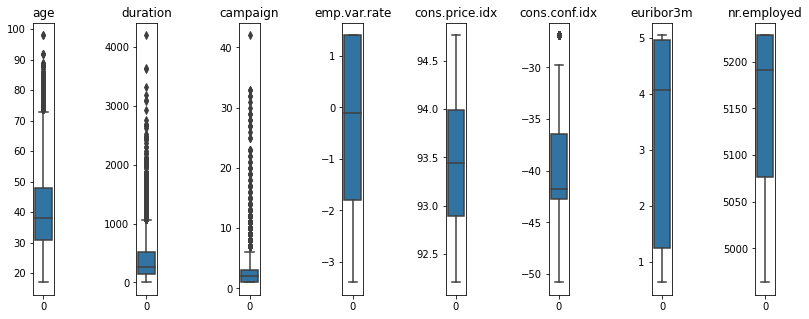

In [97]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=4, hspace=5)
for i in range(0,len(num_c)):
    plt.subplot(1,10,i+1)
    sns.boxplot(df[num_c[i]])
    plt.title(num_c[i])

In [98]:
def find_outlier(col):
    Q1=col.quantile(0.25)
    Q3=col.quantile(0.75)
    lb=(Q1 - 1.5*(Q3-Q1))    #LB=Q1-1.5*IQR 
    ub=(Q3 + 1.5*(Q3-Q1))    #UB=Q3+1.5*IQR
    out_ind=np.where((col > ub) | (col < lb))
    index=list(out_ind[0])
    print('Upper bound=',ub,'Lower bound=',lb,'Number of index=',len(index))
    return index;

In [99]:
c=['age', 'duration', 'campaign', 'cons.conf.idx']
for column in c:
    outlier_ind=find_outlier(df[column])
    df.drop(outlier_ind, inplace = True)
    df.reset_index(drop=True, inplace=True)

Upper bound= 73.5 Lower bound= 5.5 Number of index= 172
Upper bound= 1072.5 Lower bound= -419.5 Number of index= 496
Upper bound= 6.0 Lower bound= -2.0 Number of index= 397
Upper bound= -26.949999999999992 Lower bound= -52.150000000000006 Number of index= 193


In [100]:
"""c=['age', 'duration', 'campaign', 'cons.conf.idx']
for column in c:
    outlier_ind=find_outlier(df[column])
    i=0
    while len(outlier_ind) > 0:
        i=i+1
        df.drop(outlier_ind, inplace = True)
        df.reset_index(drop=True, inplace=True)
        outlier_ind=find_outlier(df[column])"""

"c=['age', 'duration', 'campaign', 'cons.conf.idx']\nfor column in c:\n    outlier_ind=find_outlier(df[column])\n    i=0\n    while len(outlier_ind) > 0:\n        i=i+1\n        df.drop(outlier_ind, inplace = True)\n        df.reset_index(drop=True, inplace=True)\n        outlier_ind=find_outlier(df[column])"

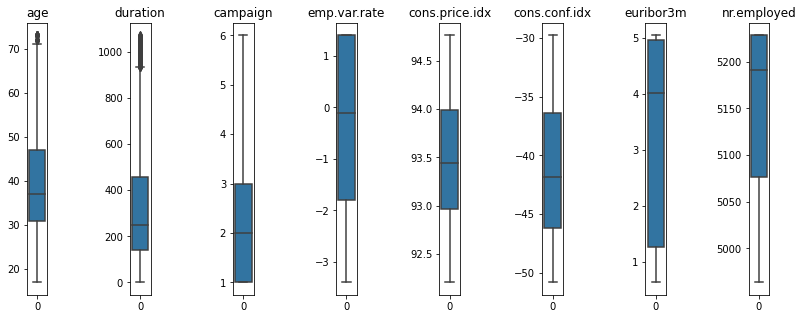

In [101]:
plt.figure(figsize=(17,5))
plt.subplots_adjust(wspace=4, hspace=5)
for i in range(0,len(num_c)):
    plt.subplot(1,10,i+1)
    sns.boxplot(df[num_c[i]])
    plt.title(num_c[i])

In [102]:
df.shape

(8382, 9)

###  INFERENCE:   <font color='brown'> Outliers were dropped from the following column:  'age', 'duration', 'campaign', 'cons.conf.idx'.</font>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Separate the dependent and the independent variables. Also, in the target variable, replace yes with 0 and no with 1 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [103]:
# Dependent variable 'y' 
df_dep = df['y']
df_dep.replace({'yes': 1,'no': 0},inplace=True)

# Independent variables - drop the column 'y' 
df_indep = df.drop('y', axis = 1)

In [104]:
df_dep.value_counts()

0    4603
1    3779
Name: y, dtype: int64

###  INFERENCE:   <font color='brown'> In the target variable 'yes' is replaced with 1 and 'no' is replaced with 0.</font>

In [105]:
df_indep.head(3)

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,32,205,2,1.1,93.994,-36.4,4.858,5191.0
1,33,400,1,-1.1,94.601,-49.5,1.032,4963.6
2,47,903,2,-1.8,93.075,-47.1,1.415,5099.1


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of all the numeric variables and find the value of skewness for each variable. </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [106]:
num_indep = df_indep.select_dtypes(include=np.number).columns.tolist()
print("Number of numeric var:" ,len(num_indep))
print(num_indep)

Number of numeric var: 8
['age', 'duration', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']


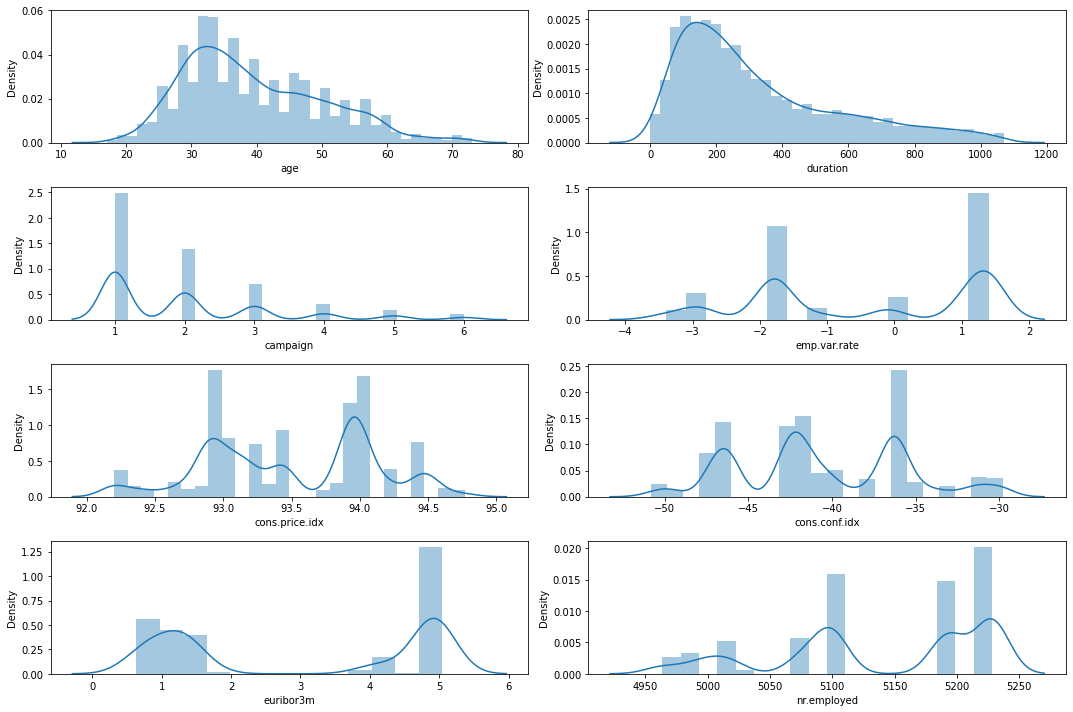

In [107]:
plt.figure(figsize= (15,10))
for i in range(0,len(num_indep)):
    plt.subplot(4,2,int(i+1))
    sns.distplot(df[num_indep[i]]) 

plt.tight_layout()
plt.show()

In [108]:
df_indep.skew()

age               0.624415
duration          1.074553
campaign          1.398961
emp.var.rate     -0.147106
cons.price.idx   -0.104677
cons.conf.idx     0.181121
euribor3m        -0.050752
nr.employed      -0.485764
dtype: float64

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Plot the distribution of the target variable.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

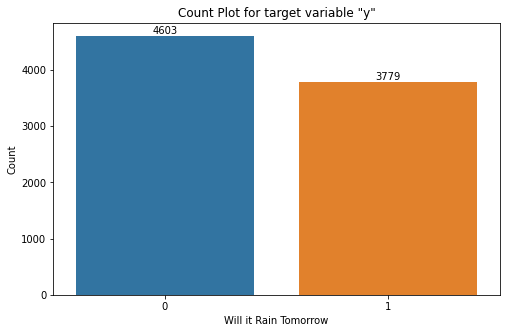

In [109]:
ax = sns.countplot(x=df_dep)
ax.bar_label(ax.containers[0])

plt.title('Count Plot for target variable "y"')
plt.xlabel('Will it Rain Tomorrow')
plt.ylabel('Count')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Scale all the numeric variables using standard scalar.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [110]:
from sklearn.preprocessing import StandardScaler 
scaler = StandardScaler()
scaled = scaler.fit_transform(df_indep)

# creating dataframe of scaled indep variables
df_scaled = pd.DataFrame(scaled, columns = df_indep.columns)
X = df_scaled
X.head()

,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,-0.699026,-0.493191,0.019091,0.922072,0.802581,0.834068,0.990008,0.623447
1,-0.605376,0.299039,-0.785051,-0.390707,1.781215,-1.774916,-1.053021,-2.049115
2,0.705730,2.342584,0.019091,-0.808409,-0.679074,-1.296934,-0.848505,-0.456625
3,-1.354579,-0.338808,0.823234,-0.808409,-1.053116,-1.874495,-0.786562,-0.456625
4,-0.324425,-0.456627,-0.785051,0.206011,-0.477543,-0.281222,0.595926,0.679860


<a id="logreg"> </a>
## 2. Logistic regression model

In [111]:
import statsmodels
import statsmodels.api as sm

X = sm.add_constant(X)
X_train, X_test, y_train, y_test = train_test_split(X, df_dep, random_state = 10, test_size = 0.2)

# print dimension of train set
print('X_train =', X_train.shape)
print('y_train =', y_train.shape)

# print dimension of test set
print('X_test =', X_test.shape)
print('y_test =', y_test.shape)

X_train = (6705, 9)
y_train = (6705,)
X_test = (1677, 9)
y_test = (1677,)


In [112]:
logreg = sm.Logit(y_train, X_train).fit()
print(logreg.summary())

Optimization terminated successfully.
         Current function value: 0.357766
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                 6705
Model:                          Logit   Df Residuals:                     6696
Method:                           MLE   Df Model:                            8
Date:                Tue, 20 Jun 2023   Pseudo R-squ.:                  0.4799
Time:                        17:53:26   Log-Likelihood:                -2398.8
converged:                       True   LL-Null:                       -4612.1
Covariance Type:            nonrobust   LLR p-value:                     0.000
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.3652      0.038     -9.599      0.000      -0.440      -0.291
age              

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>How does a unit change in each feature influence the odds of a client subscribed a term deposit or not?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [113]:
df_odds = pd.DataFrame(np.exp(logreg.params), columns= ['Odds']) 

# print the dataframe
df_odds

,Odds
const,0.694066
age,0.978048
duration,6.794216
campaign,0.965758
emp.var.rate,0.179691
cons.price.idx,1.309809
cons.conf.idx,1.112553
euribor3m,3.243773
nr.employed,0.233478


###  INFERENCE:   <font color='brown'> Odds_const: The odds of getting an admission is 0.694066 when all other variables are considered as zero.

### <font color='brown'> odds_duration = 6.794216, it implies that the odds of the client subsribing a term deposit increases by a factor of 6.794216 for one unit increase in the last contract duration, keeping other variables constant.

### <font color='brown'> odds_cons.price.idx = 1.309809, it implies that the odds of the client subsribing a term deposit increases by a factor of 1.309809 for one unit increase in the last consumer price index, keeping other variables constant.

### <font color='brown'> odds_cons.conf.idx = 1.112553, it implies that the odds of the client subsribing a term deposit increases by a factor of 1.112553 for one unit increase in the last consumer confidence index, keeping other variables constant.

### <font color='brown'> odds_euribor3m_Score = 3.243773, it implies that the odds of the client subsribing a term deposit increases by a factor of 3.243773 for one unit increase in the euribor 3 month rate, keeping other variables constant.


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal threshold</b>
                </font>
            </div>
        </td>
    </tr>
</table> 

In [114]:
from sklearn.metrics import roc_curve

# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Finding optimal threshold using Youden's Index
youdens_table = pd.DataFrame({'TPR': tpr,
                             'FPR': fpr,
                             'Threshold': thresholds})

# calculate the difference between TPR and FPR for each threshold and store the values in a new column 'Difference'
youdens_table['Difference'] = youdens_table.TPR - youdens_table.FPR

# sort the dataframe based on the values of difference 
youdens_table = youdens_table.sort_values('Difference', ascending = False).reset_index(drop = True)

# print the first five observations
youdens_table.head()

,TPR,FPR,Threshold,Difference
0,0.885863,0.189845,0.396348,0.696017
1,0.866407,0.173289,0.450598,0.693118
2,0.897536,0.205298,0.367359,0.692238
3,0.867704,0.175497,0.440620,0.692208
4,0.866407,0.175497,0.443175,0.690911


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                        <b>For the full model, calculate the accuracy manually using the confusion matrix. Consider 0.5 as the probability threshold.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [115]:
# let 'y_pred_prob' be the predicted values of y
y_pred_prob = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_pred_logreg = [ 0 if x < 0.5 else 1 for x in y_pred_prob]

y_pred_logreg[0:5]

[1, 1, 1, 0, 0]

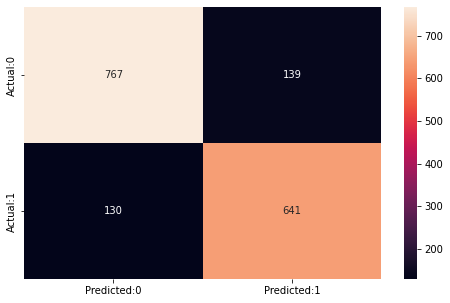

In [116]:
from sklearn.metrics import confusion_matrix

# create a confusion matrix
cm = confusion_matrix(y_test, y_pred_logreg)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

plt.rcParams['figure.figsize'] = [8,5]

# display the plot
plt.show()

In [117]:
# True Negatives are denoted by 'TN'- Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'- Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'(type 1 error) - Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN' (type 2 error) - Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.8395945140131187

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate value of kappa for the full model . Consider threshold value as 0.18</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [118]:
from sklearn.metrics import cohen_kappa_score

# let 'y_pred_prob' be the predicted values of y
y_pred_for_kappa = logreg.predict(X_test)

# convert probabilities to 0 and 1 using 'if_else'
y_pred_for_kappa1 = [ 0 if x < 0.18 else 1 for x in y_pred_for_kappa]

# compute the kappa value
kappa = cohen_kappa_score(y_test, y_pred_for_kappa1)

# print the kappa value
print('kappa value:',kappa)

kappa value: 0.6030691861727899


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Calculate the cross entropy for the logistic regression model.</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [119]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(y_test, y_pred_prob):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(y_test * np.log(y_pred_prob + epsilon) + (1 - y_test) * np.log(1 - y_pred_prob + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(y_test, y_pred_prob)
print("Cross-entropy loss:", loss)

Cross-entropy loss: 0.36082194905100085


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Predict whether a client subscribed a term deposit or not. For the logistic regression model find the following:<br> <ol type = "a">
                        <li> Precision </li>
                        <li> Recall</li>   
                        <li> F<sub>1</sub> score </li>
                        </ol>
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [120]:
# Precision
precision = TP / (TP+FP)
print('Precision =',precision)

# Recall
recall = TP / (TP+FN)
print('Recall =',recall)

# F1 score
f1_score = 2*((precision*recall)/(precision+recall))
print('F1 score =',f1_score)

Precision = 0.8217948717948718
Recall = 0.8313878080415046
F1 score = 0.8265635074145713


## 3.Build a Decision Tree model and generate a classification report.



In [166]:
# Decision Tree 
from sklearn.tree import DecisionTreeClassifier
regressor = DecisionTreeClassifier()
from sklearn.metrics import classification_report

In [167]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_indep, df_dep, test_size=0.2, random_state=42)

# Train a decision tree classifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred = classifier.predict(X_test)
y_pred[0:5]

array([0, 1, 0, 0, 1], dtype=int64)

In [168]:
# Generate the classification report
report = classification_report(Y_test, y_pred)
print("Classification Report:\n",report)

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       936
           1       0.81      0.82      0.81       741

    accuracy                           0.84      1677
   macro avg       0.83      0.83      0.83      1677
weighted avg       0.84      0.84      0.84      1677



<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [169]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'ccp_alpha': [0.1, .01, .001],
              'max_depth' : [5, 6, 7, 8, 9],
              'criterion' :['gini', 'entropy']
             }
tree_clas = DecisionTreeClassifier(random_state=1024)
grid_search = GridSearchCV(estimator=tree_clas, param_grid=param_grid, cv=5, verbose=True)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1024),
             param_grid={'ccp_alpha': [0.1, 0.01, 0.001],
                         'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9],
                         'max_features': ['auto', 'sqrt', 'log2']},
             verbose=True)

In [170]:
final_model = grid_search.best_estimator_
final_model

DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)

In [171]:
# Split the dataset
X_train, X_test, Y_train, Y_test = train_test_split(df_indep, df_dep, test_size=0.2, random_state=42)

# Train a decision tree classifier after optimised parameter
classifier_optimal = DecisionTreeClassifier(ccp_alpha=0.001, criterion='entropy', max_depth=9,
                       max_features='log2', random_state=1024)
classifier_optimal.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred_dt_optimal = classifier_optimal.predict(X_test)
y_pred_dt_optimal[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [172]:
# Generate the classification report
report = classification_report(Y_test, y_pred)
print("Before using optimal parameters:\n",report)

Before using optimal parameters:
               precision    recall  f1-score   support

           0       0.85      0.85      0.85       936
           1       0.81      0.82      0.81       741

    accuracy                           0.84      1677
   macro avg       0.83      0.83      0.83      1677
weighted avg       0.84      0.84      0.84      1677



In [173]:
# Generate the classification report
report_optimal = classification_report(Y_test, y_pred_dt_optimal)
print("After using optimal parameters:\n",report_optimal)

After using optimal parameters:
               precision    recall  f1-score   support

           0       0.91      0.88      0.90       936
           1       0.86      0.89      0.87       741

    accuracy                           0.89      1677
   macro avg       0.88      0.89      0.89      1677
weighted avg       0.89      0.89      0.89      1677



###  INFERENCE:   <font color='brown'> After optimising Decision Tree model, the value of precision for class 0 has increased from 0.85 to 0.91 and recall has increased from 0.85 to 0.88. For class 1, the precision has increaed from 0.81 to 0.86 and recall increased 0.82 to 0.89.

## 4.Build a Random Forest model with n_estimators=30 and generate a classification report.



In [174]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
scores = cross_val_score(RandomForestClassifier(n_estimators=30), X, df_dep, cv=5)
print("Cross-val-score:",scores)
print("Mean of Cross-val-score:",scores.mean())

Cross-val-score: [0.88968396 0.88014311 0.87828162 0.88842482 0.87171838]
Mean of Cross-val-score: 0.8816503786310079


In [175]:
# Split the dataset into train and test sets
X_train, X_test, Y_train, Y_test = train_test_split(df_indep, df_dep, test_size=0.2, random_state=42)

# Train a decision tree classifier
rf = RandomForestClassifier()
rf.fit(X_train, Y_train)

# Predict the labels for the test set
y_pred = rf.predict(X_test)
y_pred[0:5]

array([1, 1, 0, 0, 1], dtype=int64)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [154]:
from sklearn.model_selection import GridSearchCV
tuned_parameters = [{'criterion': ['entropy', 'gini'],
                    'n_estimators': [10,30,50,70,90],
                    'max_depth': [10,15,20],
                    'max_features': ['sqrt', 'log2'],
                    'min_samples_split': [2,5,8,11],
                    'min_samples_leaf': [1,5,9],
                    'max_leaf_nodes': [2,5,8,11]}]

rf = RandomForestClassifier(random_state=10)
rf_grid = GridSearchCV(estimator = rf, param_grid = tuned_parameters, cv=5)
rf_grid_model = rf_grid.fit(X_train, Y_train)
print('Best parameters for random forest classifier:', rf_grid_model.best_params_, '\n')

Best parameters for random forest classifier: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'log2', 'max_leaf_nodes': 11, 'min_samples_leaf': 9, 'min_samples_split': 2, 'n_estimators': 70} 



In [156]:
rf_model = RandomForestClassifier(criterion = rf_grid_model.best_params_.get('criterion'), 
                                 n_estimators = rf_grid_model.best_params_.get('n_estimators'),
                                 max_depth = rf_grid_model.best_params_.get('max_depth'),
                                 max_features = rf_grid_model.best_params_.get('max_features'),
                                 max_leaf_nodes = rf_grid_model.best_params_.get('max_leaf_node'),
                                 min_samples_leaf = rf_grid_model.best_params_.get('min_samples_leaf'),
                                 min_samples_split = rf_grid_model.best_params_.get('min_samples_split'),
                                 random_state = 10)
rf_model=rf_model.fit(X_train, Y_train)
scores = cross_val_score(rf_model, X, df_dep, cv=5) 
scores.mean()

0.8868994809745212

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [176]:
clf_report = classification_report(Y_test, y_pred)
print("Before using optimal parameters:\n")
print(clf_report)

Before using optimal parameters:

              precision    recall  f1-score   support

           0       0.92      0.87      0.89       936
           1       0.84      0.91      0.88       741

    accuracy                           0.89      1677
   macro avg       0.88      0.89      0.89      1677
weighted avg       0.89      0.89      0.89      1677



In [177]:
from sklearn.metrics import classification_report
y_pred_rf_after=rf_model.predict(X_test)
clf_report = classification_report(Y_test, y_pred_rf_after)
print("After using optimal parameters:\n")
print(clf_report)

After using optimal parameters:

              precision    recall  f1-score   support

           0       0.94      0.86      0.90       936
           1       0.84      0.93      0.88       741

    accuracy                           0.89      1677
   macro avg       0.89      0.89      0.89      1677
weighted avg       0.89      0.89      0.89      1677



###  INFERENCE:   <font color='brown'> After optimising Random Forest model, the value of precision for class 0 has increased from 0.92 to 0.94 and recall has decreased from 0.87 to 0.86 which is good. For class 1, the precision remains the same 0.84 and recall has increased 0.91 to 0.93.

## 5.Build the XGBoost model with a learning rate of 0.4 and gamma equal to 3. Calculate the accuracy by plotting the confusion matrix

In [178]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [179]:
import xgboost as xgb

# Create DMatrix for XGBoost
dtrain = xgb.DMatrix(X_train, label=Y_train)

# Set XGBoost parameters
params = {'learning_rate': 0.4,'gamma': 3}

# Train the XGBoost model
model = xgb.train(params, dtrain)

# Once the model is trained, you can use it for prediction or evaluation
dtest = xgb.DMatrix(X_test)
y_pred_xgb = model.predict(dtest)
y_pred_xgb[0:5]

array([0.92362744, 0.85886586, 0.03250541, 0.15765665, 0.8887255 ],
      dtype=float32)

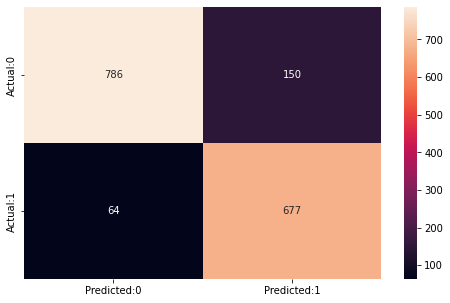

In [180]:
from sklearn.metrics import confusion_matrix

# create a confusion matrix
cm = confusion_matrix(Y_test, y_pred_xgb_binary)

# label the confusion matrix  
conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

In [181]:
# True Negatives are denoted by 'TN'- Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'- Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'(type 1 error) - Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN' (type 2 error) - Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.8723911747167561

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal hyperparameters using GridSearchCV</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [182]:
# Create the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the parameter grid for GridSearchCV
param_grid = {'learning_rate': [0.1, 0.2, 0.3], 'max_depth': [3, 4, 5], 'n_estimators': [50, 100, 200]}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3)

# Fit the GridSearchCV object to the data
grid_search.fit(X_train, Y_train)

print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.2, 'max_depth': 4, 'n_estimators': 50}
Best score:  0.8851603281133483


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [203]:
dtrain = xgb.DMatrix(X_train, label=Y_train)

# Set XGBoost parameters
params = {'learning_rate': 0.2,'max_depth': 4,'n_estimators' : 50}

# Train the XGBoost model
model_optimised = xgb.train(params, dtrain)

# Once the model is trained, you can use it for prediction or evaluation
# For example, if you have a test dataset X_test, you can predict the labels using:
dtest = xgb.DMatrix(X_test)
y_pred_xgb_optimised = model_optimised.predict(dtest)

[19:59:34] WARNING: C:/Users/administrator/workspace/xgboost-win64_release_1.6.0/src/learner.cc:627: 
Parameters: { "n_estimators" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.




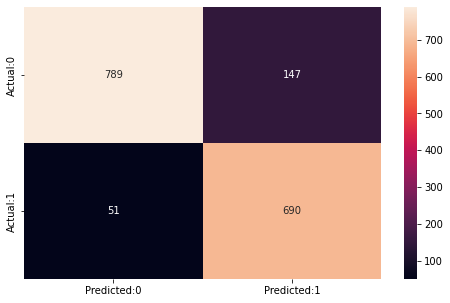

In [204]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, y_pred_xgb_binary_optimised)

conf_matrix = pd.DataFrame(data = cm,columns = ['Predicted:0','Predicted:1'], index = ['Actual:0','Actual:1']) 
sns.heatmap(conf_matrix, annot = True, fmt = 'd')

plt.rcParams['figure.figsize'] = [8,5]
plt.show()

In [205]:
# True Negatives are denoted by 'TN'- Actual 'O' values which are classified correctly
TN = cm[0,0]

# True Positives are denoted by 'TP'- Actual '1' values which are classified correctly
TP = cm[1,1]

# False Positives are denoted by 'FP'(type 1 error) - Actual 'O' values which are classified wrongly as '1'
FP = cm[0,1]

# False Negatives are denoted by 'FN' (type 2 error) - Actual '1' values which are classified wrongly as '0'
FN = cm[1,0]

# calculate the accuracy
accuracy = (TN+TP) / (TN+FP+FN+TP)
accuracy

0.8819320214669052

###  INFERENCE:   <font color='brown'> After optimising XGBoost model, model accuracy has increased from 0.87 to 0.881.

## 6.Build the K - Nearest Neighbor Model

In [186]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors=2)  # Set the number of neighbors = 2

# Train the KNN classifier
knn.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_knn = knn.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_knn)
print("Accuracy:", accuracy)

Accuracy: 0.7978533094812165


<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Determining optimal K-Value using Elbow Curve Method</b>
                </font>
            </div>
        </td>
    </tr>
</table>

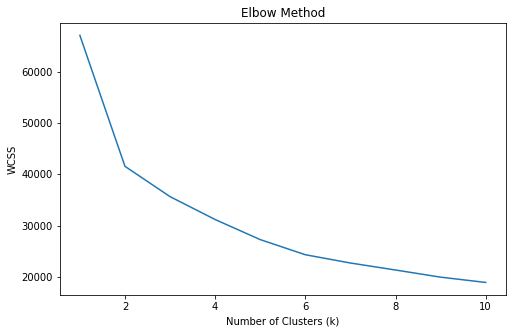

In [210]:
from sklearn.cluster import KMeans
wcss = []

# Perform K-means clustering for different values of k
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=10)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plotting the WCSS values
plt.plot(range(1, 11), wcss)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the Full model and optimized model using model performance metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [211]:
from sklearn.neighbors import KNeighborsClassifier

# Create a KNN classifier
knn_elbow = KNeighborsClassifier(n_neighbors=2)  # 2 is taken from elbow method

# Train the KNN classifier
knn_elbow.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_knn_elbow = knn_elbow.predict(X_test)

# Calculate the accuracy of the classifier
accuracy = accuracy_score(Y_test, y_pred_knn_elbow)
print("Accuracy:", accuracy)

Accuracy: 0.7978533094812165


###  INFERENCE:   <font color='brown'> For K - Nearest Neighbor Model, accuracy remains same (i.e., 80% ) for both before and after  model optimization .

## 7. Build the Naive Bayes Model


In [227]:
from sklearn.naive_bayes import GaussianNB

# Create a Gaussian Naive Bayes classifier
nb_gaussian = GaussianNB()

# Train the Naive Bayes classifier
nb_gaussian.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_gaussian = nb_gaussian.predict(X_test)

# Calculate the accuracy of the classifier
g_accuracy = accuracy_score(Y_test, y_pred_gaussian)

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare the classification results of Gaussian, Bernoulli and Multinomial Naive Bayes</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [229]:
from sklearn.naive_bayes import BernoulliNB

# Create a Bernoulli Naive Bayes classifier
nb_bern = BernoulliNB()

# Train the Naive Bayes classifier
nb_bern.fit(X_train, Y_train)

# Predict labels for the test set
y_pred_bern = nb_bern.predict(X_test)

# Calculate the accuracy of the classifier
b_accuracy = accuracy_score(Y_test, y_pred_bern)

In [230]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.metrics import accuracy_score

# Discretize the numerical features into bins
n_bins = 5
discretizer = KBinsDiscretizer(n_bins=n_bins, encode='ordinal', strategy='uniform')
X_discretized = discretizer.fit_transform(df_indep)

# Split the dataset into training and testing sets
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(X_discretized, df_dep, test_size=0.2, random_state=42)

# Train Multinomial Naive Bayes classifier
nb_classifier = MultinomialNB()
nb_classifier.fit(X_train1, Y_train1)

# Make predictions on the test set
y_pred_multi = nb_classifier.predict(X_test1)

# Calculate accuracy
m_accuracy = accuracy_score(Y_test1, y_pred_multi)

In [231]:
print("Accuracy of Gaussian Naive Bayes:", g_accuracy)
print("Accuracy of Bernoulli Naive Bayes:", b_accuracy)
print("Accuracy of Multinomial Naive Bayes:", m_accuracy)

Accuracy of Gaussian Naive Bayes: 0.7787716159809183
Accuracy of Bernoulli Naive Bayes: 0.6970781156827669
Accuracy of Multinomial Naive Bayes: 0.8121645796064401


###  INFERENCE:   <font color='brown'> Out of all 3 Naive Bayes model, Multinomial Naive Bayes has highest accuracy score 0.81</font>

## 8. Compare the results of all above mentioned algorithms 

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using model performance evaluation metrics
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [236]:
print("Accuracy scores of all models")
print("------------------------------")

# Logistic regression model
print("Logistic Regression is 0.84 ")

# Decision Tree model
print("Decision Tree is 0.89")

# Random forest
print("Random Forest model is 0.89")

# XGBoost
print("XGBoost model is 0.88")

# K Nearest Neighbour
print("K Nearest Neighbour model is 0.80")

# Gaussian Naive Bayes
print("Gaussian Naive Bayes model is 0.77")

# Bernoulli 
print("Bernoulli Naive Bayes model is 0.70")

# Multinomial
print("Multinomial Naive Bayes model is 0.81 ")

Accuracy scores of all models
------------------------------
Logistic Regression is 0.84 
Decision Tree is 0.89
Random Forest model is 0.89
XGBoost model is 0.88
K Nearest Neighbour model is 0.80
Gaussian Naive Bayes model is 0.77
Bernoulli Naive Bayes model is 0.70
Multinomial Naive Bayes model is 0.81 


###  INFERENCE:   <font color='brown'>Higher Accuracy values indicate better overall correctness of the model's predictions.When we compare all classifier models, Decision Tree and Random Forest models have highest accuracies 0.89, indicating better overall correctness in their predictions compared to the other models. They are followed by XGBoost model 0.88</font>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>Compare all the classification models using their ROC curves.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

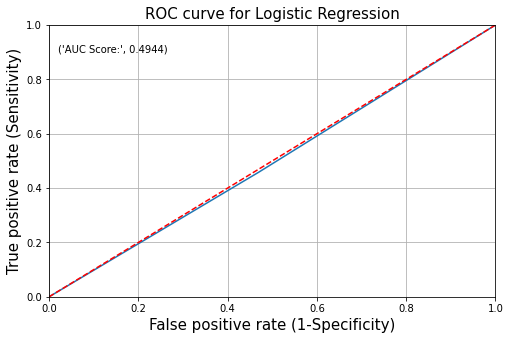

In [218]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_logreg)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Logistic Regression', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_logreg),4)))
                               
# plot the grid
plt.grid(True)

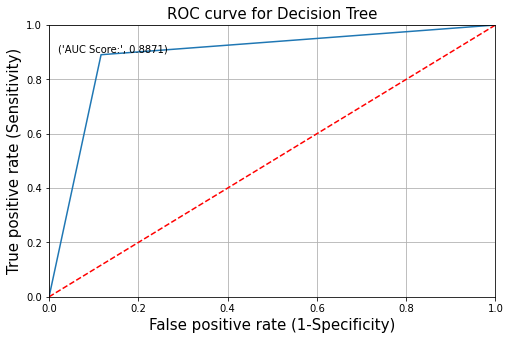

In [237]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_dt_optimal)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Decision Tree', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_dt_optimal),4)))
                               
# plot the grid
plt.grid(True)

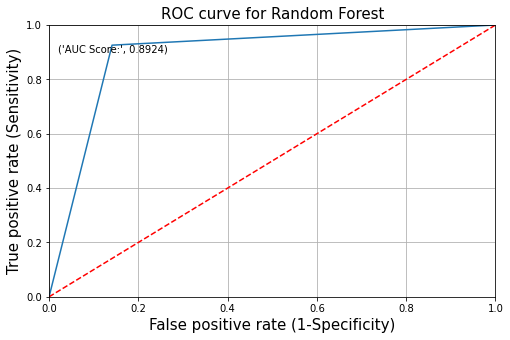

In [238]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_rf_after)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Random Forest', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_rf_after),4)))
                               
# plot the grid
plt.grid(True)

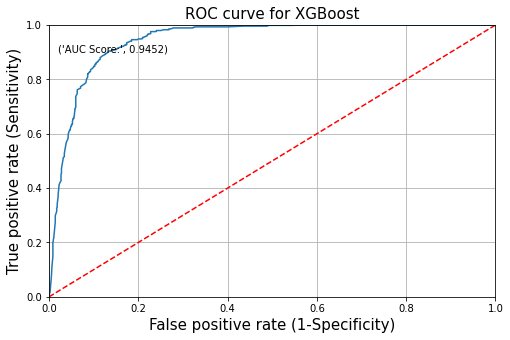

In [220]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_xgb_optimised)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for XGBoost', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_xgb_optimised),4)))
                               
# plot the grid
plt.grid(True)

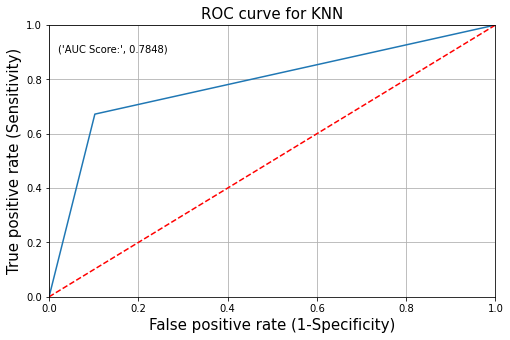

In [221]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_knn_elbow)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for KNN', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_knn_elbow),4)))
                               
# plot the grid
plt.grid(True)

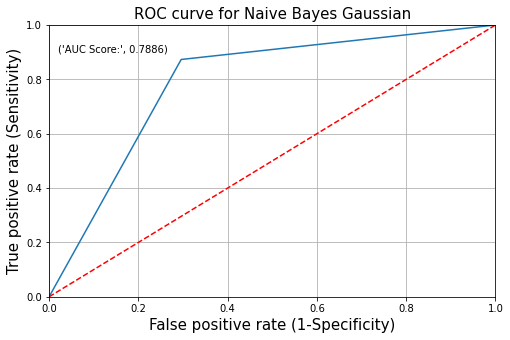

In [222]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_gaussian)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes Gaussian', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_gaussian),4)))
                               
# plot the grid
plt.grid(True)

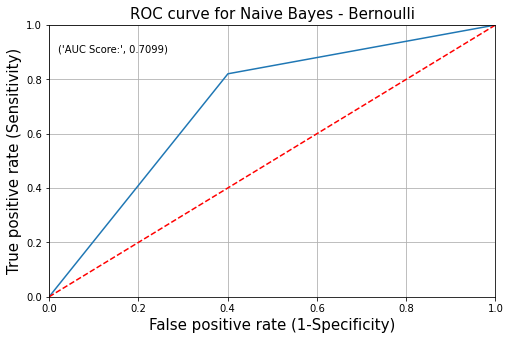

In [223]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test, y_pred_bern)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes - Bernoulli', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test, y_pred_bern),4)))
                               
# plot the grid
plt.grid(True)

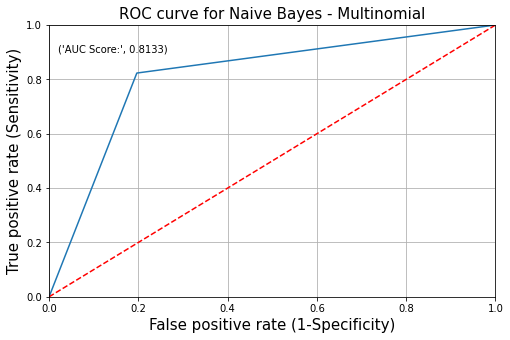

In [224]:
# the roc_curve() returns the values for false positive rate, true positive rate and threshold
# pass the actual target values and predicted probabilities to the function
fpr, tpr, thresholds = roc_curve(Y_test1, y_pred_multi)

# plot the ROC curve
plt.plot(fpr, tpr)

# set limits for x and y axes
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])

# plot the straight line showing worst prediction for the model
plt.plot([0, 1], [0, 1],'r--')

# add plot and axes labels
# set text size using 'fontsize'
plt.title('ROC curve for Naive Bayes - Multinomial', fontsize = 15)
plt.xlabel('False positive rate (1-Specificity)', fontsize = 15)
plt.ylabel('True positive rate (Sensitivity)', fontsize = 15)

# add the AUC score to the plot
# 'x' and 'y' gives position of the text
# 's' is the text 
# use round() to round-off the AUC score upto 4 digits
plt.text(x = 0.02, y = 0.9, s = ('AUC Score:', round(metrics.roc_auc_score(Y_test1, y_pred_multi),4)))
                               
# plot the grid
plt.grid(True)

In [240]:
print("AUC scores of all models")
print("------------------------------")

# Logistic regression model
print("Logistic Regression is 0.4944 ")

# Decision Tree model
print("Decision Tree is 0.8871")

# Random forest
print("Random Forest model is 0.8924")

# XGBoost
print("XGBoost model is 0.9452")

# K Nearest Neighbour
print("K Nearest Neighbour model is 0.7848")

# Gaussian Naive Bayes
print("Gaussian Naive Bayes model is 0.7886")

# Bernoulli 
print("Bernoulli Naive Bayes model is 0.7099")

# Multinomial
print("Multinomial Naive Bayes model is 0.8133 ")

AUC scores of all models
------------------------------
Logistic Regression is 0.4944 
Decision Tree is 0.8871
Random Forest model is 0.8924
XGBoost model is 0.9452
K Nearest Neighbour model is 0.7848
Gaussian Naive Bayes model is 0.7886
Bernoulli Naive Bayes model is 0.7099
Multinomial Naive Bayes model is 0.8133 


###  INFERENCE:   <font color='brown'> Higher AUC scores indicate better discrimination ability of the model. When we compare AUC score of classifier models, XGBoost has the highest AUC score 0.9452, indicating better performance in terms of its ability to discriminate between positive and negative instances compared to the other models. This is followed by Random Forest model 0.8924 and  Decision Tree with value 0.88</font>

<table align="left">
    <tr>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>comput cross entropy and Compare all the classification models.
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [242]:
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_prob):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_prob + epsilon) + (1 - Y_test) * np.log(1 - y_pred_prob + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_prob)
print("Cross-entropy loss for Logistic Regression:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_dt_optimal):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_dt_optimal + epsilon) + (1 - Y_test) * np.log(1 - y_pred_dt_optimal + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_dt_optimal)
print("Cross-entropy loss for Decision Tree:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_rf_after):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_knn_elbow + epsilon) + (1 - Y_test) * np.log(1 - y_pred_rf_after + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_rf_after)
print("Cross-entropy loss for Random Forest model:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_xgb_optimisedl):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_xgb_optimised + epsilon) + (1 - Y_test) * np.log(1 - y_pred_xgb_optimised + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_xgb_optimised)
print("Cross-entropy loss for XGBoost:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_knn_elbow):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_knn_elbow + epsilon) + (1 - Y_test) * np.log(1 - y_pred_knn_elbow + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_knn_elbow)
print("Cross-entropy loss for KNN:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_gaussian):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_gaussian + epsilon) + (1 - Y_test) * np.log(1 - y_pred_gaussian + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_gaussian)
print("Cross-entropy loss for Naive Bayes Gaussian:", loss)

###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test, y_pred_bern):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test * np.log(y_pred_bern + epsilon) + (1 - Y_test) * np.log(1 - y_pred_bern + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test, y_pred_bern)
print("Cross-entropy loss for Naive Bayes Bernoulli:", loss)


###################################################################
# Define the sigmoid function
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Calculate cross-entropy loss
def cross_entropy_loss(Y_test1, y_pred_multi):
    epsilon = 1e-7  # small value to avoid division by zero
    loss = -(Y_test1 * np.log(y_pred_multi + epsilon) + (1 - Y_test1) * np.log(1 - y_pred_multi + epsilon))
    return np.mean(loss)

# Calculate the cross-entropy loss
loss = cross_entropy_loss(Y_test1, y_pred_multi)
print("Cross-entropy loss for Naive Bayes Multinomial:", loss)

Cross-entropy loss for Logistic Regression: 0.31709657097617167
Cross-entropy loss for Decision Tree: 1.8261407423864773
Cross-entropy loss for Random Forest model: 3.604225246815411
Cross-entropy loss for XGBoost: 0.3128691075539653
Cross-entropy loss for KNN: 3.2582196135211414
Cross-entropy loss for Naive Bayes Gaussian: 3.5657801764493735
Cross-entropy loss for Naive Bayes Bernoulli: 4.882523836485898
Cross-entropy loss for Naive Bayes Multinomial: 3.0275491913249537


###  INFERENCE:   <font color='brown'> Generally, lower values of cross-entropy loss indicate better performance and alignment between predicted probabilities and true labels. The model with the lowest cross-entropy loss is XGBoost model, which has a value of 0.3128691075539653. It means XGBoost model has the best alignment with the true labels compared to the other models.</font>

## 9. Intrepret your solution based on the results

###  INFERENCE:   <font color='brown'> Lets review few major evaluation metrics,
    
### <font color='blue'> Cross-entropy loss: The model with the lowest cross-entropy loss is XGBoost model, which has a value of 0.3128691075539653.

### <font color='blue'> AUC score: The model with the highest AUC score is also XGBoost model, which has a score of 0.9452.

### <font color='blue'> Accuracy score: The models with the highest accuracy scores are Decision Tree and Random Forest, both having a score of 0.89 followed by XGBoost which has a value of 0.88( which is almost equal to the highest accuracy score).

###  <font color='brown'> Considering these values, XGBoost emerges as the best classifier model. It achieves the lowest cross-entropy loss and highest AUC score among the listed models, indicating good alignment with true labels and strong discriminatory power and also has higher accuracy score almost equal to highest value.

### <font color='green'>  Therefore XGBoost (eXtreme Gradient Boosting) works as the best classifier model for this dataset.